In [2]:
import flopy
import numpy as np

In [3]:
modelname = 'Ex01_E2'
exe_name = '/home/harsh/work/modflow/MF2005.1_12u/make/mf2005'
model_ws = 'Results/'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws=model_ws)

In [4]:
Lx = 1000.
Ly = 1000.
ztop = 0.
zbot = -50.
nlay = 1
nrow = 10
ncol = 10
delr = Lx/ncol
delc = Lx/nrow
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc, top=ztop, botm=zbot)

In [6]:
ibound = np.ones((nlay, nrow, ncol), dtype = np.int32)
ibound[:,:,0] = -1
ibound[:,:,-1] = -1

In [7]:
strt = np.ones((nlay, nrow, ncol), dtype=np.float32)
strt[:,:,0] = 10
strt[:,:,-1] = 0
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [9]:
lpf = flopy.modflow.ModflowLpf(mf, hk=10., vka=10., ipakcb=53)

In [10]:
spd = {(0,0):['print head', 'print budget', 'save head', 'save budget']}
oc = flopy.modflow.ModflowOc(mf, stress_period_data=spd, compact=True)

In [11]:
pcg = flopy.modflow.ModflowPcg(mf)

In [12]:
mf.write_input()

In [13]:
mf.run_model()

FloPy is using the following  executable to run the model: /home/harsh/work/modflow/MF2005.1_12u/make/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: Ex01_E2.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2021/06/22 20:54:05

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2021/06/22 20:54:05
 Elapsed run time:  0.006 Seconds

  Normal termination of simulation


(True, [])

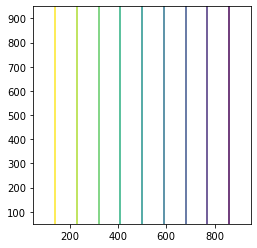

In [14]:
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf

plt.subplot(1,1,1, aspect='equal')

hds = bf.HeadFile(model_ws + modelname + '.hds')
head = hds.get_data(totim=1.0)
levels = np.arange(1, 10, 1)
extent = (delr/2, Lx - delr/2, Ly - delc/2, delc/2)
plt.contour(head[0,:,:], levels=levels, extent=extent)
plt.savefig(model_ws+'Ex01_E2.png')